In [35]:
%matplotlib inline
import matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imsave

In [1]:
img = cv2.imread('Marina.jpg',cv2.IMREAD_GRAYSCALE)
#cv2.imshow('image', img)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.plot([200,400],[100,300],'c', linewidth=5)
plt.show()
cv2.imwrite('marina-cv2-gray.png',img)

NameError: name 'cv2' is not defined

In [4]:
img = cv2.imread('Marina.jpg',cv2.IMREAD_COLOR)

# cv2.line(img,(0,0),(150,150),(0,255,255),10)
# cv2.rectangle(img,(15,25),(200,150),(0,0,255),2)
# cv2.circle(img,(100,63), 55, (0,255,0), -1)

# pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
# true - should we "connect" the final and starting dot,
# cv2.polylines(img, [pts], True, (0,255,255), 3)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'My sweet girl!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)

cv2.imshow('image',img)
cv2.waitKey(0) # если не указать, то будет сразу закрываться
# cv2.waitKey(1) & 0xFF == ord('q')
cv2.destroyAllWindows()

In [ ]:
color_spaces = ('RGB','GRAY','HSV','LAB','XYZ','YUV')
color_images = {color : cv2.cvtColor(image_bgr, getattr(cv2,'COLOR_BGR2' + color)) for color in color_spaces}
for color in color_images:
    cv2.imshow(color, color_images[color])
cv2.waitKey(0)

In [ ]:
px = img[55,55]
img[55,55] = [255,255,255]

In [ ]:
px = img[55,55]
print(px)

In [ ]:
img[100:150,100:150] = [255,255,255]

In [ ]:
print(img.shape)
print(img.size)
print(img.dtype)

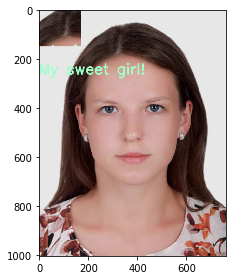

In [7]:
marina_face = img[37:111,107:194]
img[0:74,0:87] = marina_face

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
imshow("marina-marina-small.png")

In [8]:
import cv2
import numpy as np

# 500 x 250
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')

# add = img1+img2 # total mess!
add = cv2.add(img1,img2)

cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Merge two images (weighted)

In [ ]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')

weighted = cv2.addWeighted(img1, 0.2, img2, 0.8, 0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

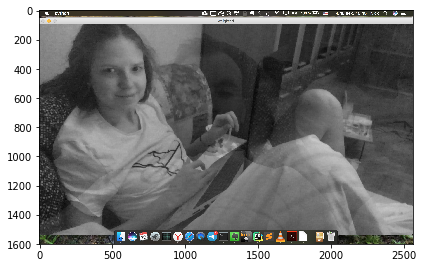

In [2]:
imshow("opencv add-images.png")

## Add logo to image

In [4]:
import cv2
import numpy as np

# Load two images
img1 = cv2.imread('Marina.jpg') # back
img2 = cv2.imread('mainlogo.png') # logo

cv2.imshow("logo", img2)

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols] 
cv2.imshow("roi", img2)


# Now create a mask of logo and create its inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2.imshow("img2gray", img2gray)

# add a threshold
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV) # pixels darker than 220 will become white, others
                                                                     # will be black. Output is black and white    
cv2.imshow("mask", mask)

mask_inv = cv2.bitwise_not(mask)

cv2.imshow("mask_inv", mask_inv)


# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv) # оставляет наименьшее значение из двух (итог: чёрное посадочн место)
cv2.imshow("img1_bg", img1_bg)

# what are the arguments for bitwise_and? They are:
# src – single input array 
# dst – output array that has the same size and type as the input arrays 
# mask – optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed
# http://opencvexamples.blogspot.com/2013/10/bitwise-and-or-xor-and-not.html

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask) # оставляет наименьшее значение из двух
cv2.imshow("img2_fg", img2_fg)

dst = cv2.add(img1_bg,img2_fg) # к чёрным (нулевым) значениям на любой из фоток добавляет соотв значение пикселя с другой
img1[0:rows, 0:cols ] = dst # перезаписываем значения из дст в оригинальное изображение

cv2.imshow("dst", dst)

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

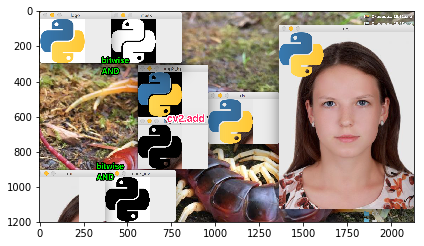

In [3]:
imshow("cv2addlogo.png")

In [ ]:
import cv2
import numpy as np

img = cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

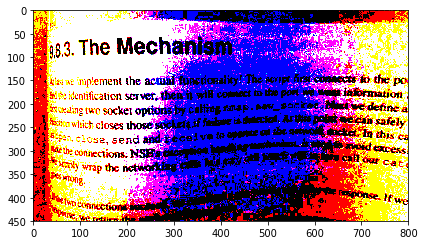

In [2]:
imshow("threshold_screenshot_15.12.2017.png")

In [ ]:
import cv2
import numpy as np

th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

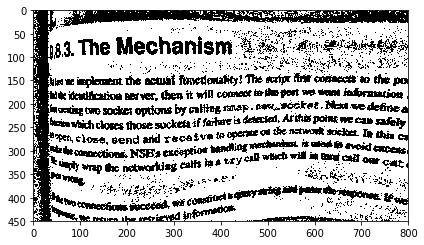

In [3]:
imshow("gauss bookpage.png")

## This code captures and saves video from built-in webcam

In [3]:
import numpy as np
import cv2
import time

# cap = cv2.VideoCapture('vtest.avi') # from file
# specifying the video output resolution to exactly the same as input, width and height, 640x480 by default
# out = cv2.VideoWriter('output.avi',fourcc, 20.0,(int(cap.set(3,320)),int(cap.set(4,240))))

cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('output.avi',fourcc, 20.0,(int(cap.get(3)),int(cap.get(4))))

time.sleep(5)

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,1) # write the flipped frame
        out.write(frame)
        cv2.imshow('frame', frame)

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # to show gray video
        #cv2.imshow('gray', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# но непонятно, куда сохраняются эти видео

In [1]:
import cv2
import numpy as np

img = cv2.imread("marina-red.jpg")

while(1):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,50,50])
    upper_red = np.array([45,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(img,img, mask= mask)

    #cv2.imshow('img',img)
    # cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(0) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [32]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # [80,118,50]
    lower_red = np.array([103,83,39])
    upper_red = np.array([180,200,180])
    # [103  83  39]
    mask = cv2.inRange(hsv, lower_red, upper_red) # binary black and white, red is white (perhaps 1)
    res = cv2.bitwise_and(frame,frame, mask= mask) # only ones from mask and that corresponding area from frame
    blur = cv2.GaussianBlur(res,(15,15),0)
    median = cv2.medianBlur(res,15) # no artefacts!
    
    moments = cv2.moments(mask, 1) # получим моменты 
    x_moment = moments['m01']
    y_moment = moments['m10']
    area = moments['m00']
    try:
        x = int(x_moment / area) # Получим координаты x,y кота
        y = int(y_moment / area) # и выведем текст на изображение
        cv2.putText(median, "Red Box!", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2) 
    
    except ZeroDivisionError:
        print("Show me the red box!")
    
    cv2.imshow('Median Blur',median) 
    #cv2.imshow('Gaussian Blurring',blur)
    #cv2.imshow('frame',frame)
    #cv2.imshow('mask',mask)
    #cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

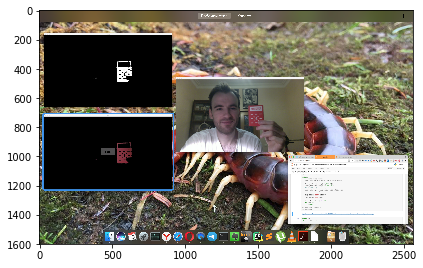

In [3]:
imshow("detecting red.png")

https://stackoverflow.com/questions/10948589/choosing-correct-hsv-values-for-opencv-thresholding-with-inranges

## Can use this code to get HSV values from camera

In [31]:
import cv2
import numpy as np


cap = cv2.VideoCapture(0)

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')

# Starting with 100's to prevent error while masking
h,s,v = 100,100,100

# Creating track bar
cv2.createTrackbar('h', 'result',0,179,nothing)
cv2.createTrackbar('s', 'result',0,255,nothing)
cv2.createTrackbar('v', 'result',0,255,nothing)

while(1):

    _, frame = cap.read()

    #converting to HSV
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    # get info from track bar and appy to result
    h = cv2.getTrackbarPos('h','result')
    s = cv2.getTrackbarPos('s','result')
    v = cv2.getTrackbarPos('v','result')

    # Normal masking algorithm
    lower_blue = np.array([h,s,v])
    upper_blue = np.array([180,255,255])

    mask = cv2.inRange(hsv,lower_blue, upper_blue)

    result = cv2.bitwise_and(frame,frame,mask = mask)

    cv2.imshow('result',result)
    print(np.array([h,s,v]))
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[18  0  0]
[18  0  0]
[18  0  0]
[18  0  0]
[18  0  0]
[33  0  0]
[33  0  0]
[33  0  0]
[33  0  0]
[33  0  0]
[33  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[42  0  0]
[59  0  0]
[59  0  0]
[59  0  0]
[59  0  0]
[59  0  0]
[72  0  0]
[72  0  0]
[72  0  0]
[72  0  0]
[72  0  0]
[97  0  0]
[97  0  0]
[97  0  0]


KeyboardInterrupt: 

In [5]:
import cv2
import numpy as np

bgr = np.uint8([[[180,255,50]]])
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV)
print(hsv)

[[[ 79 205 255]]]


In [53]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    # we slide this slider around, and if all of the pixels are white, then we get white, otherwise black
    erosion = cv2.erode(mask,kernel,iterations = 1)
    
    # does the opposite: Slides around, if the entire area isn't black, then it is converted to white
    dilation = cv2.dilate(mask,kernel,iterations = 1)

    #  to remove "false positives" so to speak. in the background you get some pixels here and there of "noise."
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # to remove false negatives. Basically this is where you have your detected shape, like our hat, 
    # and yet you still have some black pixels within the object
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    edges = cv2.Canny(frame,30,50)
    cv2.imshow('Edges',edges)
    # plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))это выдаст ошибку
    # plt.show()
    
    #cv2.imshow('Opening',opening)
    #cv2.imshow('Closing',closing)
    
    cv2.imshow('Original',frame)
    #cv2.imshow('Mask',mask)
    #cv2.imshow('Erosion',erosion)
    #cv2.imshow('Dilation',dilation)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imsave
 
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

img = cv2.imread("2017-12-07 14.27.28.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

In [28]:
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
#wide = cv2.Canny(blurred, 10, 200)
#tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)
 
# show the images
#cv2.imshow("Original", img)
cv2.imshow("Edges", auto)
cv2.waitKey(0)

#cv2.imshow('Edges',edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

113

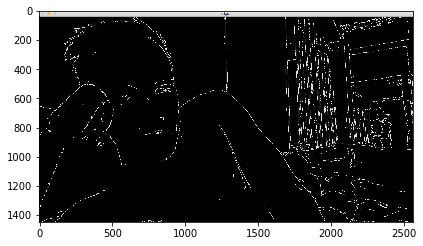

In [6]:
imshow("Canny edge detector.png")

In [118]:
import cv2
import numpy as np

img_rgb = cv2.imread("opiata.jpg")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread("hat.png", 0)
h, w = template.shape

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.55
loc = np.where( res >= threshold)

for pt in zip(*loc):
    # где, коорд левнижн угла, коорд правверхн угла, цвет линии, толщина
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

#cv2.imshow('Detected',img_rgb)
cv2.imshow("res", img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

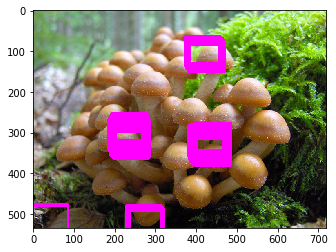

In [119]:
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

##  Непонятно

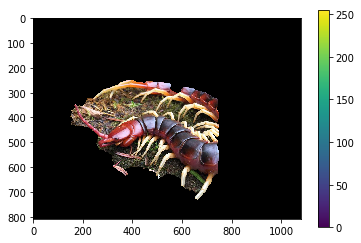

In [68]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('2017-12-07 14.27.28.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# x-tl, y-tl, x-br, y-br
rect = (150,250,600,500)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


cv2.imwrite('goddes-edit.png',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()

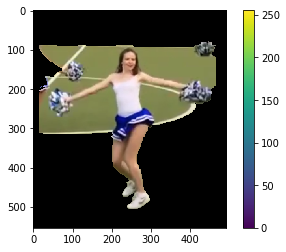

In [57]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('goddes-editcopy.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# x-tl, y-tl, x-br, y-br
rect = (15,80,450,450)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


cv2.imwrite('goddes-edit.png',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()

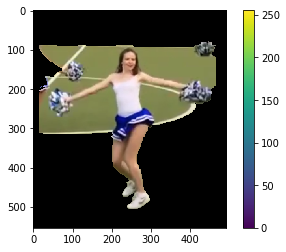

In [58]:
# newmask is the mask image I manually labelled
newmask = cv2.imread('mask-goddes5.png',0)

#plt.imshow(newmask, cmap = "gray")

# whereever it is marked white (sure foreground), change mask=1
# whereever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.colorbar()
plt.show()

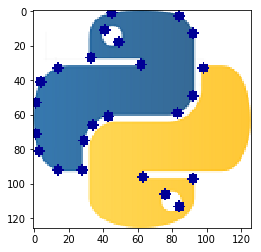

In [11]:
import numpy as np
import cv2

img = cv2.imread('mainlogo.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 100 points, tolerance?, minimum distance between corners
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,150,-1)
    
#cv2.imshow('Corner',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    frame = cv2.flip(frame,1) # write the flipped frame
    fgmask = fgbg.apply(frame)
 
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)

    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture("people-walking.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    #frame = cv2.flip(frame,1) # write the flipped frame
    fgmask = fgbg.apply(frame)
    median = cv2.medianBlur(fgmask,5) # фильтруем шум
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',median)

    
    k = cv2.waitKey(60) & 0xff
    if k == 27:
        break
    

cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

error: /opt/concourse/worker/volumes/live/68762549-a7cd-401a-4fc4-6547354af396/volume/opencv_1512680491081/work/modules/highgui/src/window.cpp:331: error: (-215) size.width>0 && size.height>0 in function imshow


In [ ]:
import numpy as np
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imsave

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('frame_screenshot_15.12.2017.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imwrite('detected.png',img)
#cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

KeyboardInterrupt: 

In [6]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imsave
 
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

img = cv2.imread("tocanny2.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

auto = auto_canny(blurred)

cv2.imwrite('cannyed2.png',auto)
# plt.imshow('cannyed.png')
# plt.show()

# show the images
#cv2.imshow("Original", img)
# cv2.imshow("Edges", auto)
# cv2.waitKey(0)

True

In [ ]:
    # Преобразуем BGR в HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # определяем границы искомого цвета
    lower_color = np.array([110,50,50])
    upper_color = np.array([130,255,255])

    # Создаём черно-белую маску исходного изображения, 
    # содержащую искомые цвета
    mask = cv2.inRange(hsv, lower_color, upper_color)

In [ ]:
start_time = time.time()
loop:
    counter += 1
    < вычисления >
break
finish_time = time.time()
fps = counter / (finish_time - start_time)

In [6]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imsave

img = cv2.imread("first-order.png", 0)
M = cv2.moments(img)
posX, posY = int(M['m10']/M['m00']), int(M['m01']/M['m00'])
cv2.circle(img,(posX,posY),6,(0,0,255),-1)
cv2.imwrite('momented.png',img)

True